In [4]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.datasets

import sklearn

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

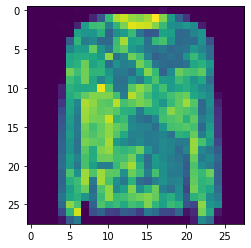

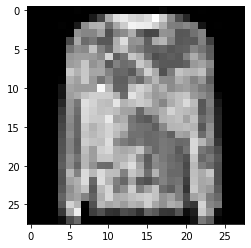

2


In [14]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap='gray')
plt.show()
print(y_train[0])